In [1]:
import os
import sys
os.getcwd()

'c:\\Users\\ebaca\\Desktop\\Phys 417\\Final Project - HEP Tagging'

In [2]:
# importing libraries & making torch.device object for GPU

# neural network packages
import torch
import torch.nn as nn
from torch.nn import Transformer
from torch import Tensor
from torch.utils.data import DataLoader

# data packages
import numpy as np
import math
import pandas as pd
import sklearn.preprocessing as prep
from sklearn.utils import shuffle
import fndict as fd

# visual packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tqdm
import warnings

# Create a torch.device object to tell pytorch where to store your tensors: cpu or gpu
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

to do
- plot $\eta$ vs $\phi$ for the constituents of a single jet 
- plot a bunch of jets and pick prettiest one
- then do that for each type of jet and combine together with color coding

thoughts
- grab list of files, randomly select 100
- iterate through those, open them and select the first files that come up for each jet type
- then plot those with the title being the name of the file

Stopped at 12 files
Particle: Gluon           File: event_0247811.npz           Matches? (1, 0, 0, 0, 0) = [1 0 0 0 0]
Particle: Light Quark     File: event_0211972.npz           Matches? (0, 1, 0, 0, 0) = [0 1 0 0 0]
Particle: W Boson         File: event_0482321.npz           Matches? (0, 0, 1, 0, 0) = [0 0 1 0 0]
Particle: Z Boson         File: event_0430271.npz           Matches? (0, 0, 0, 1, 0) = [0 0 0 1 0]
Particle: Top Quark       File: event_0408402.npz           Matches? (0, 0, 0, 0, 1) = [0 0 0 0 1]


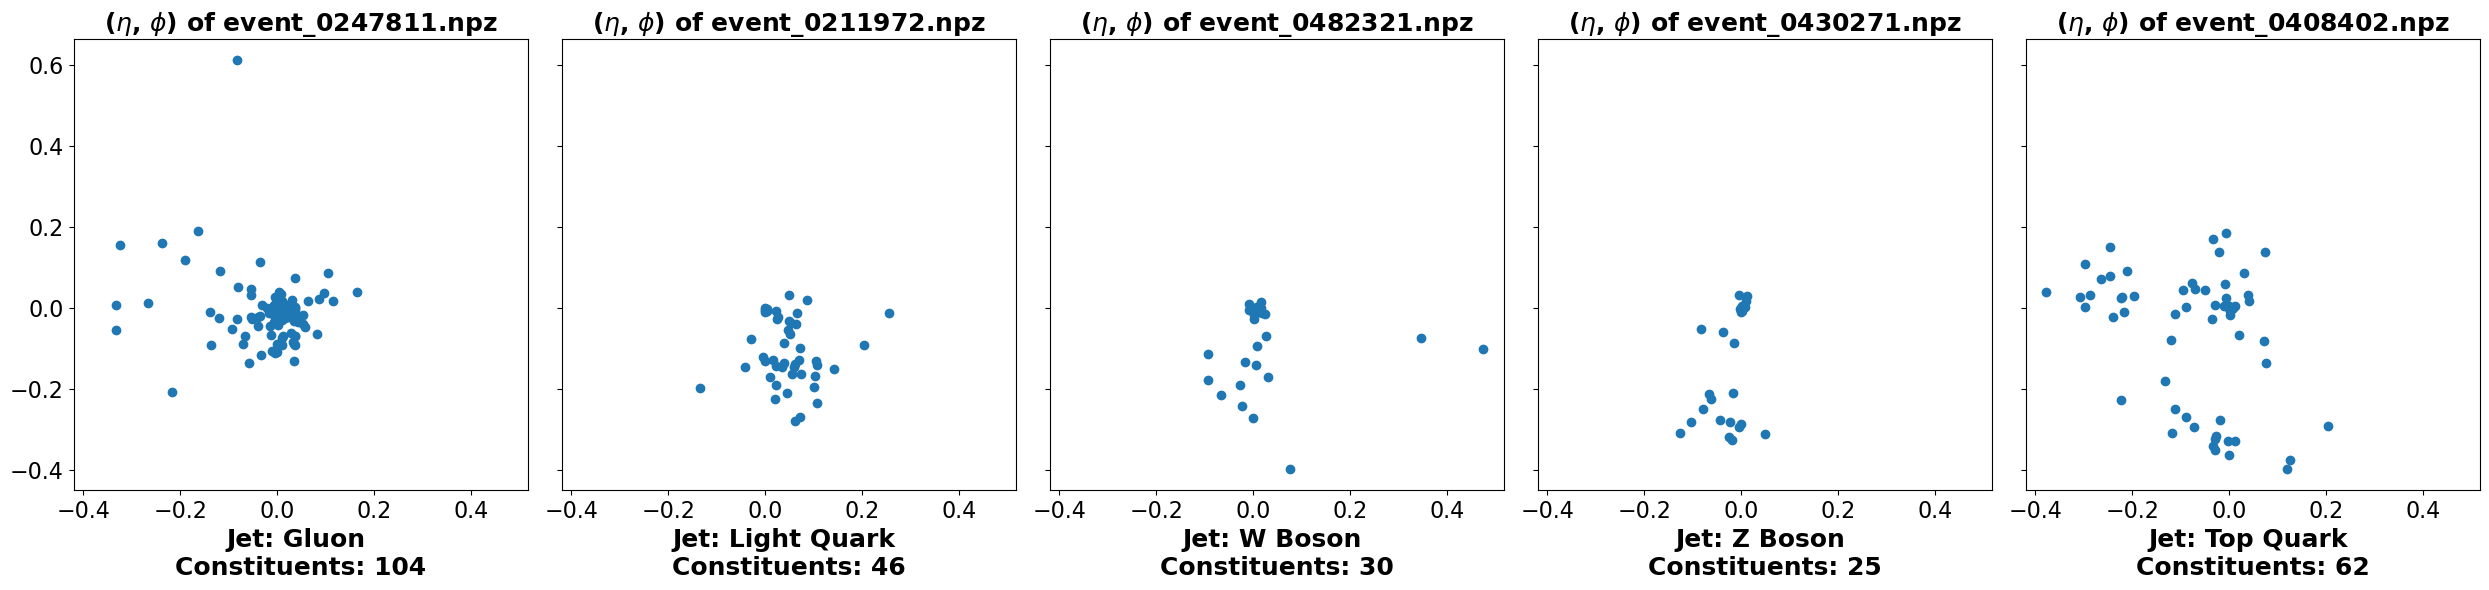

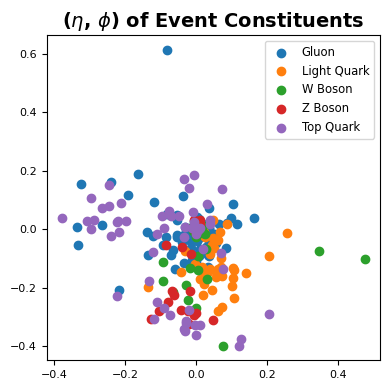

In [85]:
files = shuffle([f for f in os.listdir('../../PHYS417_Project/data')])

onehots = {
    (1, 0, 0, 0, 0): ['Gluon'],
    (0, 1, 0, 0, 0): ['Light Quark'],
    (0, 0, 1, 0, 0): ['W Boson'],
    (0, 0, 0, 1, 0): ['Z Boson'],
    (0, 0, 0, 0, 1): ['Top Quark']
}

for i, f in enumerate(files[:100]):
    with np.load('../../PHYS417_Project/data/' + f) as data:

        y = data['y']
        jet = tuple(y)

        if len(onehots[jet]) == 1:
            onehots[jet].append(f)

        if all(len(v) == 2 for v in onehots.values()):
            print(f"Stopped at {i} files")
            break

# plotting the individual jets --------------------------------------------------------------------
fig, axs = plt.subplots(1, 5, figsize=(25, 6), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)

for i, (onehot, labels) in enumerate(onehots.items()):
    jet, file = labels

    with np.load('../../PHYS417_Project/data/' + file) as data:
        print(f"Particle: {jet:<15} File: {file:<20} {'Matches?':>15} {str(onehot)} = {str(data['y'])}")
        
        eta = data['x'][:, 1]
        phi = data['x'][:, 2]

        axs[i].scatter(eta, phi)
        axs[i].set_title(f'($\eta$, $\phi$) of {file}', weight='bold', fontsize=18)
        axs[i].set_xlabel(f'Jet: {jet} \nConstituents: {len(data["x"])}', weight='bold', fontsize=18)
        axs[i].tick_params(labelsize=16)

plt.tight_layout()


# plotting the jets together --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(4, 4), sharex=True, sharey=True)

for i, (onehot, labels) in enumerate(onehots.items()):
    jet, file = labels

    with np.load('../../PHYS417_Project/data/' + file) as data:
        eta = data['x'][:, 1]
        phi = data['x'][:, 2]

        ax.scatter(eta, phi, label=jet)

ax.set_title(f'($\eta$, $\phi$) of Event Constituents', weight='bold', fontsize=14)
ax.legend(loc='best', fontsize='small')
ax.tick_params(labelsize=8)
plt.tight_layout()

In [89]:
selected_onehots = {
    (1, 0, 0, 0, 0): ['Gluon', 'event_0586545.npz'], # 'event_0943422.npz'  'event_0310881.npz'
    (0, 1, 0, 0, 0): ['Light Quark', 'event_0211972.npz'], #  'event_0288662.npz'  'event_0610935.npz'  'event_0448702.npz'
    (0, 0, 1, 0, 0): ['W Boson', 'event_0060979.npz'], #  'event_0691469.npz'
    (0, 0, 0, 1, 0): ['Z Boson', 'event_0435952.npz'], # 'event_0693976.npz'  'event_0609057.npz'
    (0, 0, 0, 0, 1): ['Top Quark', 'event_0909169.npz'] #  'event_0772220.npz'
}

Particle: Gluon           One-hot vector: [1 0 0 0 0]          File: event_0586545.npz
Particle: Light Quark     One-hot vector: [0 1 0 0 0]          File: event_0211972.npz
Particle: W Boson         One-hot vector: [0 0 1 0 0]          File: event_0060979.npz
Particle: Z Boson         One-hot vector: [0 0 0 1 0]          File: event_0435952.npz
Particle: Top Quark       One-hot vector: [0 0 0 0 1]          File: event_0909169.npz


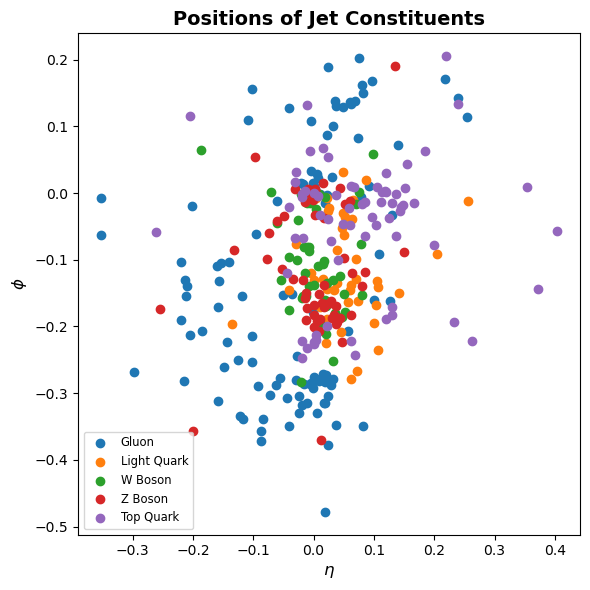

In [90]:
fig, ax = plt.subplots(figsize=(6, 6), sharex=True, sharey=True)

for i, (onehot, labels) in enumerate(selected_onehots.items()):
    jet, file = labels

    with np.load('../../PHYS417_Project/data/' + file) as data:
        print(f"Particle: {jet:<15} One-hot vector: {str(data['y']):<20} File: {file:<15}")

        eta = data['x'][:, 1]
        phi = data['x'][:, 2]

        ax.scatter(eta, phi, label=jet)

ax.set_title('Positions of Jet Constituents', weight='bold', fontsize=14)
ax.set_xlabel(f'$\eta$', fontsize=12)
ax.set_ylabel(f'$\phi$', fontsize=12)
ax.legend(loc='best', fontsize='small')
# plt.subplots_adjust(left=0.001, right=0.999, bottom=0.001, top=0.999)
plt.tight_layout()